## Predicting Chronic Kidney Disease in Patients/ write all the reason behind your decision
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: It's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [4]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, LogisticRegression

In [5]:
df = pd.read_csv('chronic_kidney_disease_full.csv')

In [6]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


        age		-	age	
        bp		-	blood pressure
        sg		-	specific gravity
		al		-       albumin (In bloodstream and helps keep fluid from leaking out of your blood vessels into other tissues.)
		su		-	sugar
		rbc		-	red blood cells
		pc		-	pus cell
		pcc		-	pus cell clumps
		ba		-	bacteria
		bgr		-	blood glucose random
		bu		-	blood urea
		sc		-	serum creatinine
		sod		-	sodium
		pot		-	potassium
		hemo	-	hemoglobin
		pcv		-	packed cell volume
		wc		-	white blood cell count
		rc		-	red blood cell count
		htn		-	hypertension
		dm		-	diabetes mellitus
		cad		-	coronary artery disease
		appet	-	appetite
		pe		-	pedal edema
		ane		-	anemia
		class	-	class	

In [8]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [9]:
df.shape

(400, 25)

In [10]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [12]:
# convert string into numeric number (int) for future use 
# first check the option for each 
for x in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']:
    if x in df.columns:
        print(f"{x}: {df[x].unique()}")

rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
htn: ['yes' 'no' nan]
dm: ['yes' 'no' nan]
cad: ['no' 'yes' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]
class: ['ckd' 'notckd']


In [13]:
# convert string into numeric number (int) for future use
# not using dummies due to it going to have too many columns, hard to see

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Or, specifically suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Optional: Change pandas downcasting behavior (if applicable)
pd.set_option('future.no_silent_downcasting', True)
df['rbc'] = df['rbc'].replace({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].replace({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].replace({'notpresent': 0, 'present': 1})
df['ba'] = df['ba'].replace({'notpresent': 0, 'present': 1})
df['htn'] = df['htn'].replace({'no': 0, 'yes': 1})
df['dm'] = df['dm'].replace({'no': 0, 'yes': 1})
df['cad'] = df['cad'].replace({'no': 0, 'yes': 1})
df['pe'] = df['pe'].replace({'no': 0, 'yes': 1})
df['ane'] = df['ane'].replace({'no': 0, 'yes': 1})
df['appet'] = df['appet'].replace({'good': 1, 'poor': 0})
df['class'] = df['class'].replace({'ckd': 1, 'notckd': 0})



In [14]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,NaN,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,1,0,0,0


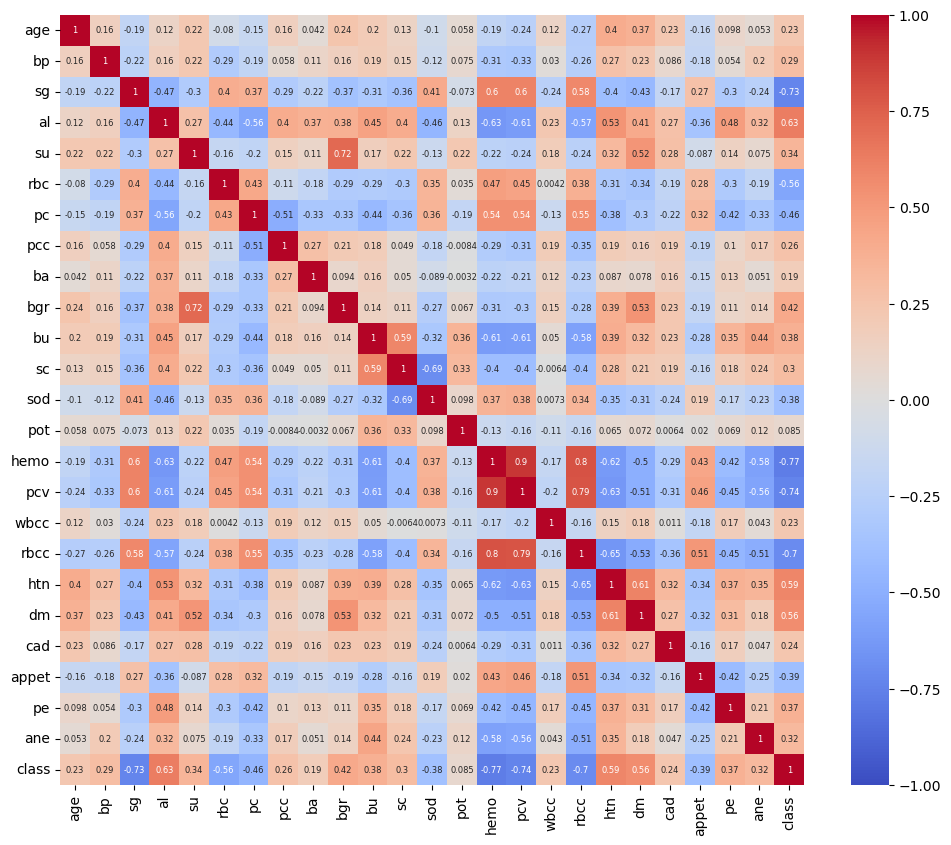

In [15]:
import seaborn as sns

# seeing the correlation to check the revalent features to 'class'
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, annot_kws={'fontsize':6}, cmap = 'coolwarm');

### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer here:
- From the correlation heatmap above, I have seen that columns factor of `sg, al, rbc, hemo, pcv, rbcc,htn, and dm` are the one that have high correlation with the class (target). Therefore, I am interesting to check these factors out more. However, those features still did not remove for the missing value and outliers

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

Answer here: 
- All of the columns except `'class'` has their missing value, `'rbc', wbcc', and 'rbcc'` have missing value of more than 100. However, I am going to use and explore only the selected above faetures which also include `rbc and rbcc`

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

In [21]:
dropall_df = df
dropall_df = dropall_df.dropna()
print(dropall_df.shape)
print(df.shape)

(158, 25)
(400, 25)


Answer here: 
- If drop all the NAN values from all the rows, the data will left with only (158/400 =39.5%), which is significantly low. and it is not sugguested to do, as we will not have enough data to analysis (or the result will be inaccurate).


### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer here:
1. data can be containing human error as recording by a doctors and nurses
2. data can be wrongly recorded such as changing in number.
3. according to the research, the data can be inaccurate if the pateint are not in a normal condition while measuring those measurements
    such as the nurse might not be careful when pateint just eaten / running before doing the check up in hospital

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has chronic kidney disease (CKD) will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer here: 
the model need to aviod false negative. 
So, we need to build the model that telling everyone that they have CKD, which is the 100% allowance for false positive.
as the CKD is set as 1 vice versa

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer here: 
we are minimizing false negative (telling people that they don't but they have)
optimizing for specificity

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer here:
disadvantage will be people who are being told that they have but dont have the CKD will get negative effect on the mental health 
as they have to worried about the diseases, may spend money on the medical treatment, and reduce productivity at their workplace.

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer here: 
opposite from question 6.
the model need to aviod false positve
So, we need to build the model that telling everyone that they dont have CKD, which is the 100% allowance for false negative.
as the CKD is set as 1 vice versa

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer here:
we are minimizing false positive (telling people that they do have but they dont have)
optimizing for sensitivity 

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer here:
disadvantage will be people who sick will believe that they are not sick, so no treatments

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [38]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [39]:
# as already make every columns into numerical (int), so import DF again as 'data'
data = pd.read_csv('chronic_kidney_disease_full.csv')
data.select_dtypes(include=['float64']).columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc'],
      dtype='object')

In [40]:
data.isnull().sum().sort_values(ascending=False).head(6)
# sg, al, rbc, hemo, pcv, rbcc,htn, and dm --> from correlation matrix

rbc     152
rbcc    131
wbcc    106
pot      88
sod      87
pcv      71
dtype: int64

In [41]:
data.isnull().sum().sort_values(ascending=False)

rbc      152
rbcc     131
wbcc     106
pot       88
sod       87
pcv       71
pc        65
hemo      52
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [42]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [43]:
# selecting features/ drop
# rbcc is selected instead of rbc is due to it is a numeric number instead of just normal / adnormals 
    # https://www.niddk.nih.gov › ... › Kidney Disease
data = data.drop('rbc', axis=1)

In [44]:
# writing the function for filling the missing value
def missing_fill_num(data, column):
    
    # fill in nan by the median of the number from who got CKD
    # df only CKD 
    CKD_df  = data[data['class'] == 'ckd'].copy()

    # replace into a number 
    CKD_df[column] = CKD_df[column].fillna(CKD_df[column].median())

    # Create a new column in data with missing values
    new_column = f"{column}_"
    data[new_column] = pd.NA

    # update the new column in data only for rows where class is ckd
    data.loc[data['class'] == 'ckd', new_column] = CKD_df[column]

    # ----- -----
    
    # fill in nan by the median of the number from who got CKD
    # df only CKD 
    nonCKD_df  = data[data['class'] == 'notckd'].copy()

    # replace into a number 
    nonCKD_df[column] = nonCKD_df[column].fillna(nonCKD_df[column].median())

    # put 'rbcc_' only for the rows where column class is 'ckd'
    data.loc[data['class'] == 'notckd', new_column] = nonCKD_df[column]

    # Drop the old column from the column
    data.drop(column, axis=1, inplace=True)

In [45]:
# filling missing value
floats_only = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc']

for i in floats_only:
    missing_fill_num(data, i)

In [46]:
data.isnull().sum()[data.isnull().sum() != 0]

pc       65
pcc       4
ba        4
htn       2
dm        2
cad       2
appet     1
pe        1
ane       1
dtype: int64

In [47]:
# dropping the missing value as it has a very small % of the total data sets
data = data.dropna(subset=['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])

In [48]:
# Get dummy variables and keep a separate column for NaN values
data = pd.get_dummies(data, columns=['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], drop_first=True)

In [49]:
# Convert all True/False into 1/0
data = data.replace({True: 1, False: 0})

In [50]:
data.columns

Index(['class', 'age_', 'bp_', 'sg_', 'al_', 'su_', 'bgr_', 'bu_', 'sc_',
       'sod_', 'pot_', 'hemo_', 'pcv_', 'wbcc_', 'rbcc_', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_poor', 'pe_yes', 'ane_yes'],
      dtype='object')

In [51]:
# make column 'class' into a numerical data
data['class'] = data['class'].replace({'ckd':1, 'notckd':0})
data['class'] = data['class'].astype(int)

In [52]:
# setting X and y
X = data[['age_', 'bp_', 'sg_', 'al_', 'su_', 'bgr_', 'bu_', 'sc_',
       'sod_', 'pot_', 'hemo_', 'pcv_', 'wbcc_', 'rbcc_', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_poor', 'pe_yes', 'ane_yes']]  # using all the features aviable is due to all features are importance and have impact on the 
                                            # prediction (according to the research)
y = data['class']

In [53]:
# splitting the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =y, random_state =42)  # stratify, make sure of y-train and y-test, 
                                                                                            # have the same proportion
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((246, 23), (246,), (83, 23), (83,))

In [54]:
y_train.value_counts(normalize=True)

class
1    0.589431
0    0.410569
Name: proportion, dtype: float64

In [55]:
y_test.value_counts(normalize=True)

class
1    0.590361
0    0.409639
Name: proportion, dtype: float64

In [56]:
# Instantaite the LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=200, random_state=42)
lr.fit(X_train, y_train)
print("Training Score:", lr.score(X_train, y_train))
print("Test Score:", lr.score(X_test, y_test))

Training Score: 0.9959349593495935
Test Score: 0.9879518072289156


In [57]:
predictions = lr.predict(X_test)

In [58]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

0.10976425998969035

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [60]:
# coefficient of rbcc
# Assuming you have a dataframe with feature names
feature_names = X_train.columns

# getitng coef
coefficients = lr.coef_

# put columns name and coef for each
coef_df = pd.DataFrame({ 'Feature': feature_names,
                        'Coefficient': coefficients[0]})

coef_df

,Feature,Coefficient
0,age_,-0.039546
1,bp_,0.088708
2,sg_,0.060691
3,al_,1.132983
4,su_,0.338889
5,bgr_,0.053630
6,bu_,-0.004662
7,sc_,1.724368
8,sod_,0.080003
9,pot_,0.122204


### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [62]:
coef_df[coef_df['Feature'] == 'rbcc_']

,Feature,Coefficient
13,rbcc_,-1.207237


The feature that choosen to be interprete the coefficient is 'rbcc' (Red Blood Cell Count). It has the coefficient of -1.207237, it can be interprated that as the Red Blood Cell Count increases by -1.207237, will lower the chance of the petient is getting CKD (predeictions value moving towards 0 --> don't having CKD)

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer:
- using logstics regression is provide us the coefficient which cannot use to easily interpreted into non-technical audience
- logistic regression is the model that can classified the target, like in this case the target is 0,1 (no CKD and have CKD)

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why?

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [67]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
confusion_matrix(y_test,predictions)

# put into dataframe
conf_matrix_df = pd.DataFrame([[tn, fp],[fn, tp]],index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

conf_matrix_df

,Predicted Negative,Predicted Positive
Actual Negative,34,0
Actual Positive,1,48


Yes, it really make sense to construct the confusion metrics due to we / hospital in this case can easy visualize that their predictions having to much false negative / positive or not and how can they make their model to reduce those mistakes.

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: the model need to aviod false negative.

We need to build the model that optimize for sensitivity, as the false negative it happend when the model is wrong in predicting that the petients that having the CKD as they dont have it. This can be very dangerous, as the person are not going to recieve any medical treatments, and might be cause to death. 

The problem is more serious when comparing to the false positive, as when predicitng that petients are having the CKD when actual they are not. They will just get some mental distress, but the truth will come soon when they are getting many times of checkups in the future.

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer: The unbalanced classes will lead to problems as they can create biased to the result of the model. The model will learn only the majority data, and having difficulty in seeing / analysising the trend of the data from the minority class.

I do not beleive that in this case of CKD data sets will have this problem, as I have checked in the above cells. The data has ~60/40 of the classifciations. 

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: Accuracy is not good (might be accurate , result might be misleading) if the data sets have an unbalanced. A model that predicts the majority class (ex: 'no CKD') most of the time will fails to catch the important cases like having CKD which is the minority class (or having less data).

So, especially in the medical field, having the false negative is more serious comapring to fasle positive. as it plays with the life of the peteints.


### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [77]:
data['class'].value_counts()

class
1    194
0    135
Name: count, dtype: int64

In [78]:
# Separate the data 
ckd_data = data[data['class'] == 1]  
nonckd_data = data[data['class'] == 0] 

# using Bootstrap the CKD data for a random sample of size 200,000
boot_ckd = ckd_data.sample(n=199671, random_state=42, replace=True, )

# Combine with the main dataframe
new_df = pd.concat([data, boot_ckd], ignore_index=True)

In [79]:
# check
print(new_df['class'].shape)
new_df['class'].value_counts()

(200000,)


class
1    199865
0       135
Name: count, dtype: int64

### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [81]:
# setting X and y
X = new_df[['age_', 'bp_', 'sg_', 'al_', 'su_', 'bgr_', 'bu_', 'sc_',
       'sod_', 'pot_', 'hemo_', 'pcv_', 'wbcc_', 'rbcc_', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_poor', 'pe_yes', 'ane_yes']]  # using all the features aviable is due to all features are importance and have impact on the 
                                            # prediction (according to the research)
y = new_df['class']

In [82]:
# splitting the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =y, random_state =42)  # stratify, make sure of y-train and y-test, 
                                                                                            # have the same proportion
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((150000, 23), (150000,), (50000, 23), (50000,))

In [83]:
y_train.value_counts(normalize=True)

class
1    0.999327
0    0.000673
Name: proportion, dtype: float64

In [84]:
y_test.value_counts(normalize=True)

class
1    0.99932
0    0.00068
Name: proportion, dtype: float64

In [85]:
# Instantaite the LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=200, random_state=42)
lr.fit(X_train, y_train)
print("Training Score:", lr.score(X_train, y_train))
print("Test Score:", lr.score(X_test, y_test))

Training Score: 0.9999133333333333
Test Score: 0.99994


In [86]:
predictions = lr.predict(X_test)

In [87]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

0.007745966692414834

In [88]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
confusion_matrix(y_test,predictions)

# put into dataframe
conf_matrix_df = pd.DataFrame([[tn, fp],[fn, tp]],index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

conf_matrix_df

,Predicted Negative,Predicted Positive
Actual Negative,31,3
Actual Positive,0,49966


The accuracy of the model is increasesing, but it biased towards the majority class (CKD), predicts that most of the time people have CKD.

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!

For now, I will still not show the model and put it in practical, even though the second modle it already get  rid of fasle negative. However, I still want to test the model's performance.

The way to improve the model can be using STOME to help adjusting the data (unbalanced data) to be more balance, so the model will not baised towards the majority class. 